# Lab 01 : Vanilla VAE - exercise

The goal is to implement a VAE architecture with MLPs to generate new MNIST images.</br>

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS4243_codes/codes/labs_lecture15/lab01_VAE'
    print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import utils
import time

In [2]:
#device= torch.device("cuda")
device= torch.device("cpu")
print(device)

cpu


In [3]:
# Libraries
import matplotlib.pyplot as plt
import logging
logging.getLogger().setLevel(logging.CRITICAL) # remove warnings

### MNIST dataset 

In [5]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

train_data=torch.load(data_path+'mnist/train_data.pt')
train_label=torch.load(data_path+'mnist/train_label.pt')
print(train_data.size())

torch.Size([60000, 28, 28])


### Network architecture

In [6]:
# Global constants
# n : nb of pixels along each spatial dimension
# dz : latent dimension
# d : hidden dimension
# b : batch size
n = train_data.size(1)
dz = 20
d = 400
b = 64


In [8]:
# Define  VAE architecture
class VAE(nn.Module):
    
    def __init__(self):
        super(VAE, self).__init__()
        # COMPLETE HERE
        # Encoder x => z
        self.linear_q        = 
        self.linear_q_mu     = 
        self.linear_q_logvar = 
        # Decoder z => x
        self.linear1_p = 
        self.linear2_p = 
        
    def forward(self, x, train=True): 
        # COMPLETE HERE
        # Encoder x => z
        if train:
            q_mu = 
            q_logvar = 
            z = 
        else:
            z = 
            q_mu, q_logvar = _, _
        # Decoder z => x
        x_hat = 
        return x_hat, q_mu, q_logvar
    
# Instantiate the network
net = VAE()
net = net.to(device)
print(net)
utils.display_num_param(net) 

# Test the forward pass, backward pass and gradient update with a single batch
init_lr = 0.001
optimizer = torch.optim.Adam(net.parameters(), lr=init_lr)
b = 64
idx = torch.LongTensor(b).random_(0,60000)
batch_images = train_data[idx,:,:].view(b,-1) # [b, n**2]
print(batch_images.size())
optimizer.zero_grad()
x_hat, q_mu, q_logvar = net(batch_images) # [b, n**2]
print(x_hat.size())
# loss
p_x = batch_images # we assume that images are Bernoulli distribution
p_xz = x_hat       # we do not perform Bernoulli sampling
loss_data =  nn.BCELoss()(p_xz, p_x)
loss_KL = -0.5* torch.mean( 1.0 + q_logvar - q_mu.pow(2.0) - q_logvar.exp() )
loss = 10* loss_data + loss_KL
loss.backward()
optimizer.step()


VAE(
  (linear_q): Linear(in_features=784, out_features=400, bias=True)
  (linear_q_mu): Linear(in_features=400, out_features=20, bias=True)
  (linear_q_logvar): Linear(in_features=400, out_features=20, bias=True)
  (linear1_p): Linear(in_features=20, out_features=400, bias=True)
  (linear2_p): Linear(in_features=400, out_features=784, bias=True)
)
There are 652824 (0.65 million) parameters in this neural network
torch.Size([64, 784])
torch.Size([64, 784])


In [10]:
# Training loop
net = VAE()
net = net.to(device)
utils.display_num_param(net) 

# Optimizer
init_lr = 0.001
optimizer = torch.optim.Adam(net.parameters(), lr=init_lr)

# Number of mini-batches per epoch
nb_batch = 200 # Nb of mini-batches per epoch
b = 64  # Batch size

start=time.time()
for epoch in range(10):

    running_loss = 0.0
    num_batches = 0
    
    for _ in range(nb_batch):
        
        # FORWARD AND BACKWARD PASS
        idx = torch.LongTensor(b).random_(0,60000)
        batch_images = train_data[idx,:,:].view(b,-1)
        optimizer.zero_grad()
        x_hat, q_mu, q_logvar = net(batch_images) 
        # loss
        p_x = batch_images # we assume that images are Bernoulli distribution
        p_xz = x_hat       # we do not perform Bernoulli sampling
        loss_data =  nn.BCELoss()(p_xz, p_x)
        loss_KL = -0.5* torch.mean( 1.0 + q_logvar - q_mu.pow(2.0) - q_logvar.exp() )
        loss = 10* loss_data + loss_KL
        loss.backward()
        optimizer.step()

        # COMPUTE STATS
        running_loss += loss.detach().item()
        num_batches += 1        
    
    # AVERAGE STATS THEN DISPLAY
    total_loss = running_loss/num_batches
    elapsed = (time.time()-start)/60
    print('epoch=',epoch, '\t time=', elapsed,'min', '\t lr=', init_lr  ,'\t loss=', total_loss )
    

There are 652824 (0.65 million) parameters in this neural network
epoch= 0 	 time= 0.022065913677215575 min 	 lr= 0.001 	 loss= 2.803382992744446
epoch= 1 	 time= 0.043290483951568606 min 	 lr= 0.001 	 loss= 2.2922678446769713
epoch= 2 	 time= 0.06263113021850586 min 	 lr= 0.001 	 loss= 2.204450750350952
epoch= 3 	 time= 0.08273301124572754 min 	 lr= 0.001 	 loss= 2.142383812069893
epoch= 4 	 time= 0.10275306701660156 min 	 lr= 0.001 	 loss= 2.0986660474538805
epoch= 5 	 time= 0.12474171320597331 min 	 lr= 0.001 	 loss= 2.0716077810525895
epoch= 6 	 time= 0.14776628017425536 min 	 lr= 0.001 	 loss= 2.0397510653734208
epoch= 7 	 time= 0.17137168248494467 min 	 lr= 0.001 	 loss= 2.0210288536548613
epoch= 8 	 time= 0.19200433095296224 min 	 lr= 0.001 	 loss= 2.013942738175392
epoch= 9 	 time= 0.21490714947382608 min 	 lr= 0.001 	 loss= 2.0023036128282548


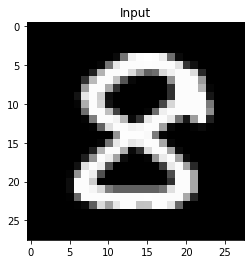

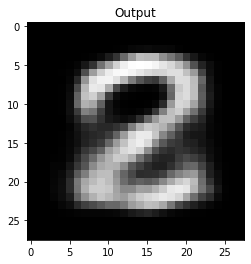

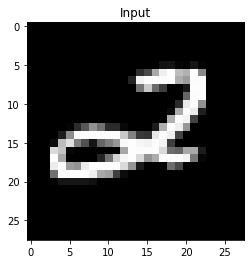

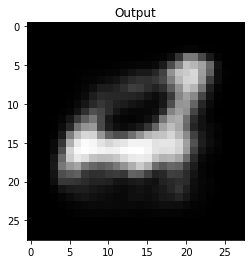

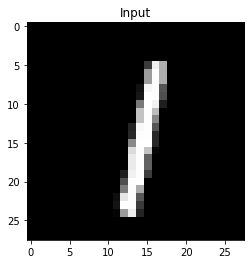

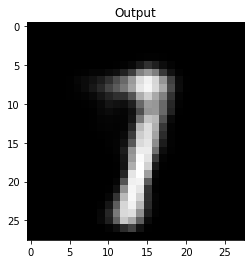

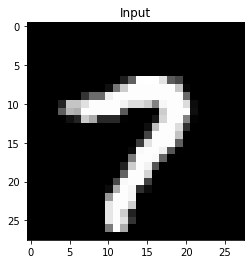

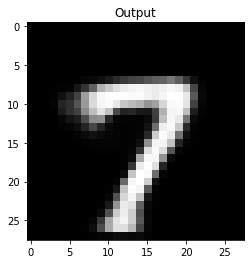

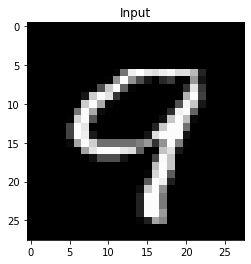

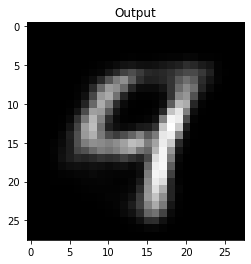

In [15]:
# Test time - auto-encode training data
b = 5
idx = torch.LongTensor(b).random_(0,60000)
batch_images = train_data[idx,:,:].view(b,-1)
x_hat, _, _ = net(batch_images) 

batch_images = batch_images.view(b,n,n)
x_hat = x_hat.view(b,n,n).detach()
        
for b in range(b):
    plt.imshow(batch_images[b,:,:], cmap='gray')
    plt.title('Input')
    #plt.axis('off')
    plt.show() 
    plt.imshow(x_hat[b,:,:], cmap='gray')
    plt.title('Output')
    plt.show() 

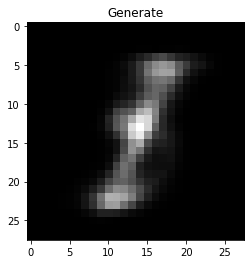

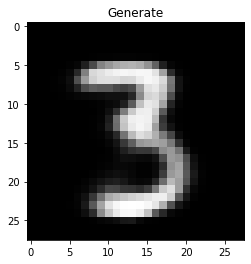

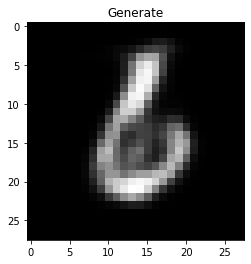

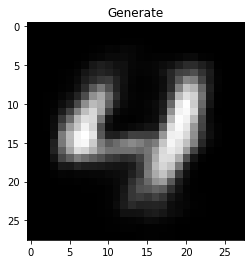

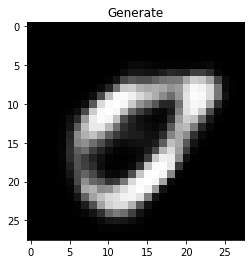

In [17]:
# Test time - generate new data
b = 5
x = torch.zeros(b, n**2)
x_hat, _, _ = net(x, False) 
x_hat = x_hat.view(b,n,n).detach()
        
for b in range(b):
    plt.imshow(x_hat[b,:,:], cmap='gray')
    plt.title('Generate')
    #plt.axis('off')
    plt.show() 